In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import requests

In [2]:
url = 'https://kdd.ics.uci.edu/databases/kddcup99/kddcup.names'
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print(response.text)
else:
    print(f"Failed to fetch the content with status code: {response.status_code}")


back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [3]:
cols="""duration,
protocol_type,
service, flag,
src_bytes, dst_bytes,
land, wrong_fragment,
urgent, hot,
num_failed_logins,
logged_in,
num_compromised,
root_ shell,
su_attempted,
num_root,
num_file_creations,
num shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerron_rate, 
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_snv_rate,
dst_host_same_sc_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerron_rate,
dst_host_srv_rerror_rate"""
columns = []
for c in cols.split(','):
    if(c.strip()):
        columns.append(c.strip())
columns.append('target')
print(len(columns))

42


In [4]:
url = 'https://kdd.ics.uci.edu/databases/kddcup99/kddcup.names'
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    lines = response.text.split('\n')[1:]  # Skip the first line
    for line in lines:
        if line:  # Check if line is not empty
            attack_name = line.split(':')[0]
            print(attack_name)
else:
    print(f"Failed to fetch the content with status code: {response.status_code}")


duration
protocol_type
service
flag
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate


In [5]:
attacks_types = {
'normal':'normal',
'back':'dos',
'buffer_overflow':'u2r',
'ftp write': 'r2l',
'guess_passwd':'r2l',
'imap':'r2l',
'ipsweep':'probe',
'land':'dos',
'loadmodule':'u2r',
'multihop':'r2l',
'neptune':'dos',
'nmap':'probe',
'perl':'u2r',
'phf':'r2l',
'pod':'dos',
'portsweep':'probe',
'rootkit':'u2r',
'satan':'probe',
'smurf':'dos',
'spy': 'r2l',
'teardrop':'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [6]:
# Fetch the column names from kddcup.names
url = 'https://kdd.ics.uci.edu/databases/kddcup99/kddcup.names'
response = requests.get(url)
lines = response.text.split('\n')
columns = [line.split(':')[0] for line in lines[1:] if line]  # Skip the first line
columns.append('target')  # The target column isn't in the .names file but is present in the .data file

# Load the actual dataset
data_path = "https://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz"
df = pd.read_csv(data_path, names=columns)

# Now you can map the target values
df['Attack Type'] = df.target.apply(lambda r: attacks_types.get(str(r)[:-1], 'unknown'))

df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [7]:
df.shape

(4898431, 43)

In [8]:
df['target'].value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: target, dtype: int64

In [9]:
df['Attack Type'].value_counts()

dos        3883370
normal      972781
probe        41102
r2l           1118
u2r             52
unknown          8
Name: Attack Type, dtype: int64

In [10]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [11]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
#Finding categorical features
num_cols = df._get_numeric_data().columns
cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')
cate_cols

['flag', 'protocol_type', 'service']

In [14]:
#visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind = "bar")

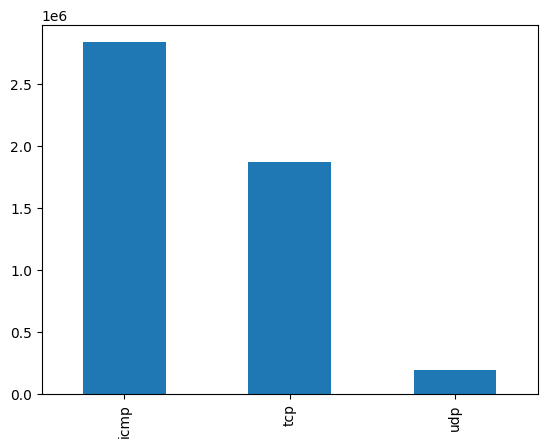

In [15]:
bar_graph('protocol_type')

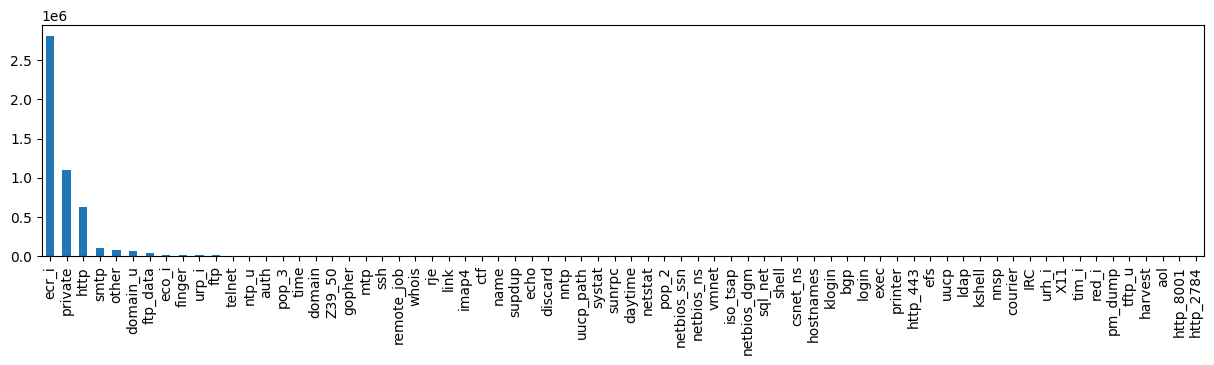

In [16]:
plt.figure(figsize=(15,3))
bar_graph('service')

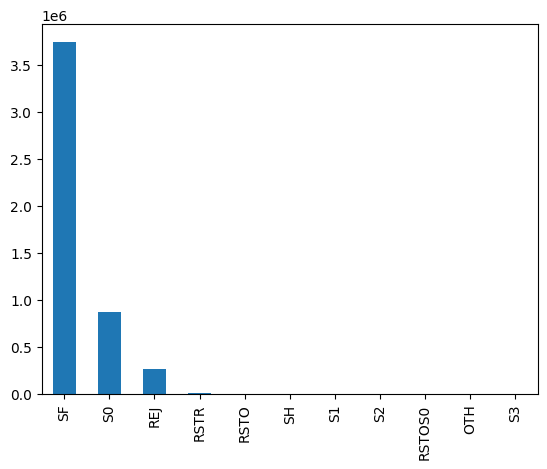

In [17]:
bar_graph('flag')

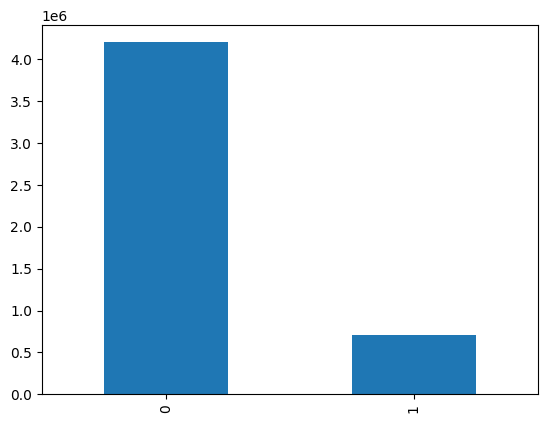

In [18]:
bar_graph('logged_in')

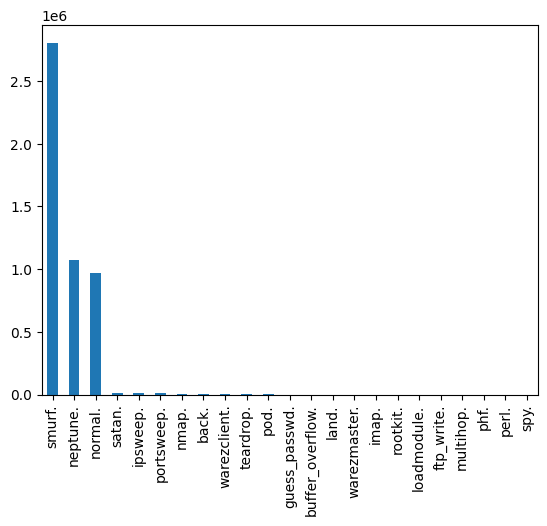

In [19]:
bar_graph('target')

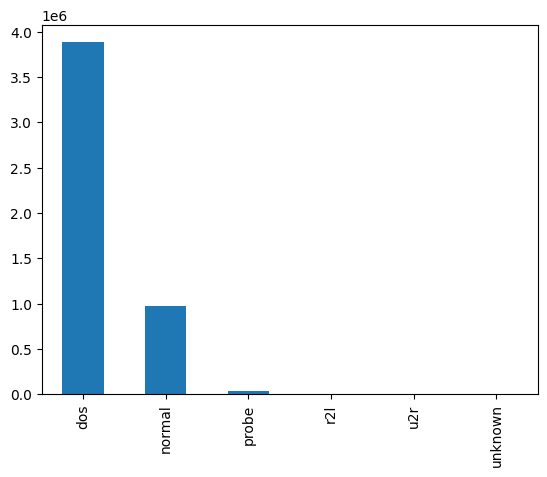

In [20]:
bar_graph('Attack Type')

In [21]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_23856\2278388781.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') #drop columns with NaN
C:\Users\hp\AppData\Local\Temp\ipykernel_23856\2278388781.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


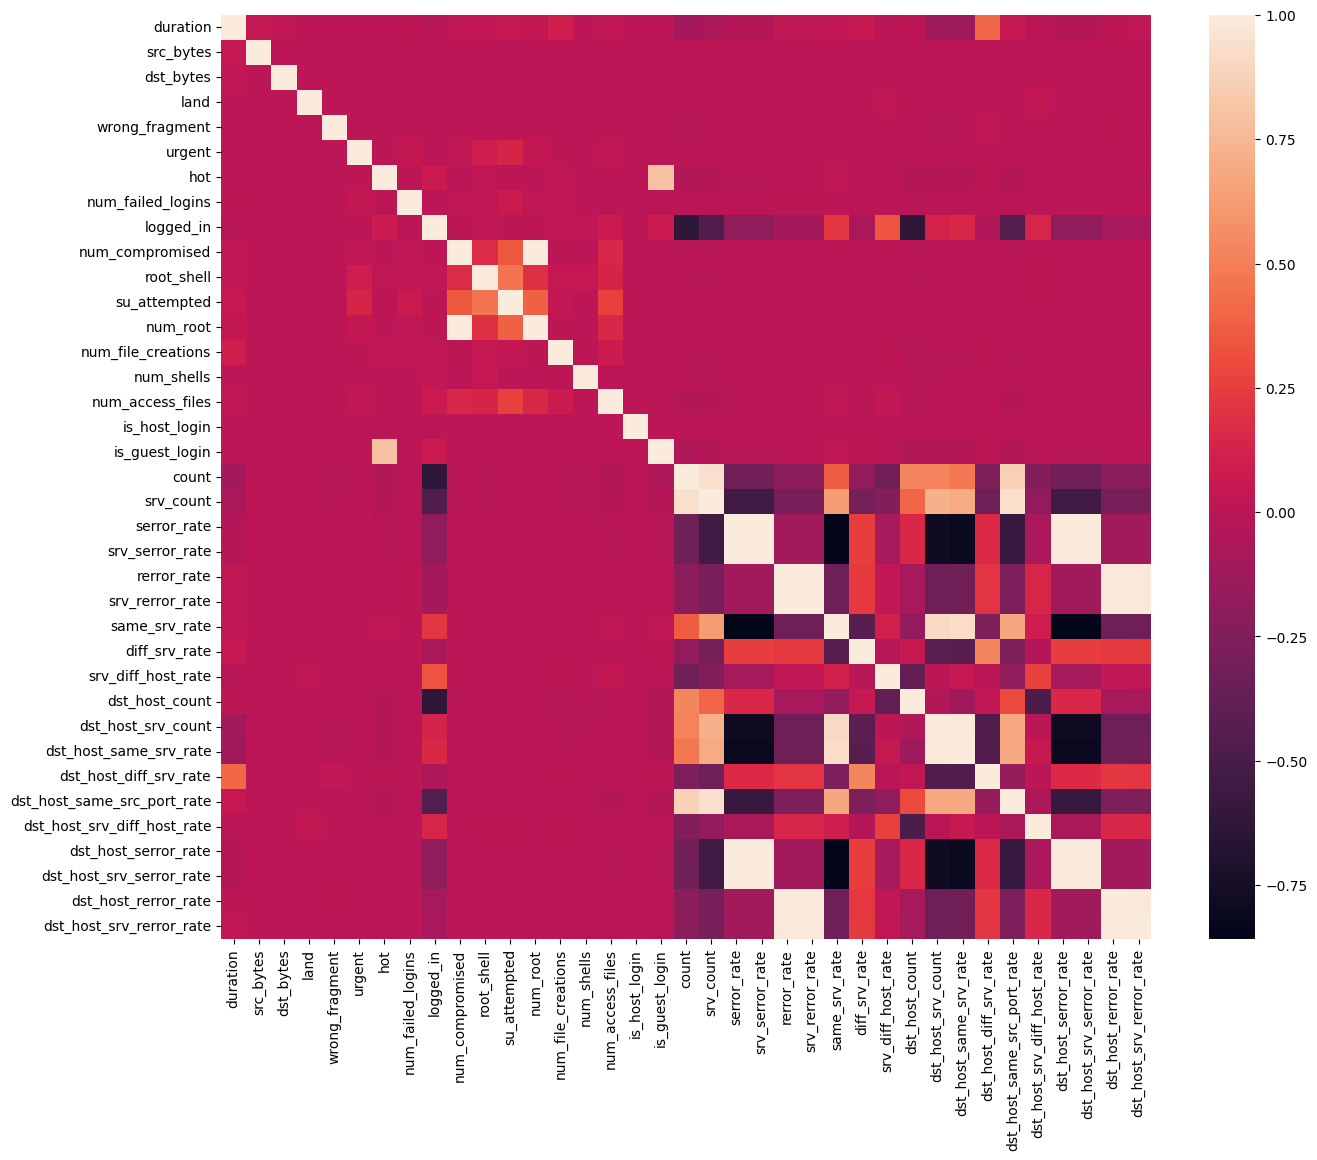

In [22]:
df = df.dropna('columns') #drop columns with NaN
df = df[[col for col in df if df[col].nunique() > 1]] #keep columns where there are more than 1 unique values
corr = df.corr()
plt.figure(figsize = (15,12))
sns.heatmap(corr)
plt.show()

In [23]:
df['num_root'].corr(df['num_compromised'])

0.9975798933478788

In [24]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998692413866282

In [25]:
df['srv_count'].corr(df['count'])

0.9433902218806605

In [26]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9953719458068605

In [27]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9788464524221455

In [28]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9982859559764777

In [29]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9869790678085133

In [30]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9316213679070299

In [31]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.9075289446663145

In [32]:
df['dst_host_same_src_port_rate'].corr(df['srv_count']) 

0.9473596471555572

In [33]:
df['dst_host_serror_rate'].corr(df['serror_rate']) 

0.9990059376729266

In [34]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate']) 

0.9979417182529224

In [35]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate']) 

0.9982509415921331

In [36]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate']) 

0.999391730038362

In [37]:
df['dst_host_rerror_rate'].corr(df['rerror_rate']) 

0.9897555886506412

In [38]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate']) 

0.985553062456559

In [39]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate']) 

0.9859781723136949

In [41]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate']) 

0.9879088754809274

In [42]:
columns_to_drop = [
    'num_root',
    'srv_serror_rate',
    'srv_rerror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'dst_host_same_srv_rate'
]

for column in columns_to_drop:
    if column in df.columns:
        df.drop(column, axis=1, inplace=True)
    else:
        print(f"Column '{column}' not found in DataFrame!")


In [ ]:
df.head()

In [ ]:
df.shape

In [43]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [44]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

C:\Users\hp\AppData\Local\Temp\ipykernel_23856\1261043509.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = df.std()


is_host_login                       0.000639
land                                0.002391
urgent                              0.007215
num_failed_logins                   0.007299
su_attempted                        0.008082
root_shell                          0.008257
num_shells                          0.008738
is_guest_login                      0.028887
num_access_files                    0.035510
dst_host_srv_diff_host_rate         0.041260
wrong_fragment                      0.042854
diff_srv_rate                       0.082715
dst_host_diff_srv_rate              0.108543
num_file_creations                  0.124186
srv_diff_host_rate                  0.140560
rerror_rate                         0.232253
logged_in                           0.350612
serror_rate                         0.381876
same_srv_rate                       0.389296
hot                                 0.468978
dst_host_same_src_port_rate         0.480988
num_compromised                     3.856481
dst_host_c

In [45]:
df['protocol_type'].value_counts()

icmp    2833545
tcp     1870598
udp      194288
Name: protocol_type, dtype: int64

In [46]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [47]:
df['flag'].value_counts()

SF        3744328
S0         869829
REJ        268874
RSTR         8094
RSTO         5344
SH           1040
S1            532
S2            161
RSTOS0        122
OTH            57
S3             50
Name: flag, dtype: int64

In [48]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5,'S1':6,'S2':7,'RSTOS0':8,'S3':9,'OTH':10}
df['flag'] = df['flag'].map(fmap)


In [49]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,215,45076,0,0,0,0,...,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,normal
1,0,1,http,0,162,4528,0,0,0,0,...,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,normal
2,0,1,http,0,236,1228,0,0,0,0,...,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,normal
3,0,1,http,0,233,2032,0,0,0,0,...,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,normal
4,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,normal


In [50]:
df.drop('service',axis=1, inplace=True)

In [51]:
df.shape

(4898431, 33)

In [52]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,215,45076,0,0,0,0,0,...,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,normal
1,0,1,0,162,4528,0,0,0,0,0,...,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,normal
2,0,1,0,236,1228,0,0,0,0,0,...,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,normal
3,0,1,0,233,2032,0,0,0,0,0,...,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,normal
4,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,normal


In [53]:
df.dtypes


duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate       

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import time

# Drop the 'target' column if it exists
if 'target' in df.columns:
    df = df.drop(['target'], axis=1)

# Select features and target
y = df[['Attack Type']]
X = df.drop(['Attack Type'], axis=1)

# Perform feature scaling
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

# Use a subset of data for faster iteration
subset_size = 100000  # Adjust this to the desired subset size
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=subset_size, test_size=0.05, random_state=42)

# Initialize Gaussian Naive Bayes model
clfg = GaussianNB()

# Training
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time:", end_time - start_time)

# Print the shapes of training and test data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Training time: 0.12766551971435547
X_train shape: (100000, 31)
X_test shape: (244922, 31)
y_train shape: (100000, 1)
y_test shape: (244922, 1)


In [63]:
start_time = time.time();
y_test_pred = clfg.predict(X_train)
end_time = time.time()

In [58]:
print("Testing time: ",end_time-start_time)

Testing time:  0.13376402854919434


In [64]:
print("Train score is:",clfg.score(X_train, y_train))
print("Test score is:",clfg.score(X_test, y_test))

Train score is: 0.85768
Test score is: 0.8582895779064356


In [65]:
print("Testing time: ",end_time-start_time)

Testing time:  0.12279033660888672


In [66]:
from sklearn.svm import SVC

In [67]:
clfs = SVC(gamma = 'scale')


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your original DataFrame 'df'
# df = ...

# Random Sampling
sample_fraction = 0.05
# Change this to the desired fraction
df_sample = df.sample(frac=sample_fraction, random_state=42)

# Feature Selection
selected_features = ['duration', 'protocol_type', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'Attack Type']  # List the features you want to keep
df_selected = df_sample[selected_features]

# Optionally, split into train and test sets
train_df, test_df = train_test_split(df_selected, test_size=0.2, random_state=42)


print("Original DataFrame shape:", df.shape)
print("Sampled DataFrame shape:", df_sample.shape)
print("Selected Features DataFrame shape:", df_selected.shape)
print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)


Original DataFrame shape: (4898431, 32)
Sampled DataFrame shape: (244922, 32)
Selected Features DataFrame shape: (244922, 32)
Train DataFrame shape: (195937, 32)
Test DataFrame shape: (48985, 32)


In [71]:
start_time = time.time()
clfs.fit(X_train, y_train.values.ravel())
end_time = time.time()



In [72]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Shuffle and split the data into a smaller subset for faster iteration
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)

# Train the model on the smaller subset
start_time = time.time()
clfs.fit(X_train_sample, y_train_sample.values.ravel())
end_time = time.time()


In [73]:
print("Training time:", end_time-start_time)

Training time: 0.06775593757629395


In [74]:
start_time = time.time()
y_test_pred = clfs.predict(X_train)
end_time = time.time()

In [75]:
print("Testing time:",end_time-start_time)

Testing time: 1.440744161605835


In [76]:
print("Train score is:",clfs.score(X_train, y_train))
print("Test score is:",clfs.score(X_test, y_test))

Train score is: 0.99775
Test score is: 0.9979830313324242


In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
clfl = LogisticRegression(max_iter=1200000)

In [79]:
start_time = time.time()
clfl.fit(X_train, y_train.values.ravel())
end_time = time.time()

In [81]:
print("Training time: ",end_time-start_time)

Training time:  2.9016995429992676


In [82]:
start_time = time.time()
y_test_pred = clfl.predict(X_train)
end_time = time.time()

In [83]:
 print("Testing time: ",end_time-start_time)

Testing time:  0.01300811767578125


In [84]:
print("Train score is:",clfl.score(X_train, y_train))
print("Test score is:",clfl.score(X_test, y_test))

Train score is: 0.99767
Test score is: 0.9978319628289822


In [86]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [87]:
 clfd = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [88]:
start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
end_time = time.time()

In [89]:
 print("Training time: ",end_time-start_time)

Training time:  0.17487072944641113


In [90]:
start_time = time.time()
y_test_pred = clfd.predict(X_train)
end_time = time.time()

In [91]:
 print("Testing time: ",end_time-start_time)

Testing time:  0.01152491569519043


In [92]:
print("Train score is:",clfd.score(X_train, y_train))
print("Test score is:",clfd.score(X_test, y_test))

Train score is: 0.99623
Test score is: 0.9961661263585958


<BarContainer object of 4 artists>

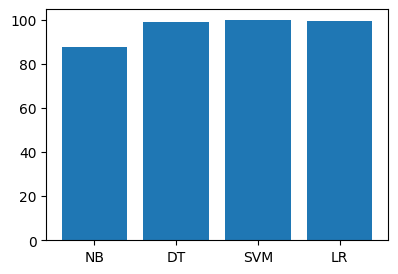

In [93]:
names = ['NB','DT','SVM','LR']
values = [87.951,99.058,99.875,99.352]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [94]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

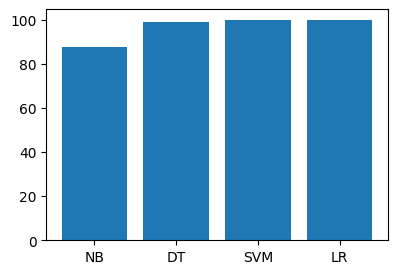

In [96]:
import matplotlib.pyplot as plt

names = ['NB', 'DT', 'SVM', 'LR']
values = [87.903, 99.052, 99.966, 99.879]  # Adjust the number of values to match the number of names

# Create a figure and subplot
f = plt.figure(figsize=(15, 3), num=10)
plt.subplot(131)

# Plot the bar chart
plt.bar(names, values)

# Show the plot
plt.show()


In [97]:
 f.savefig('training_accuracy_figure.png',bbox_inches='tight')

<BarContainer object of 4 artists>

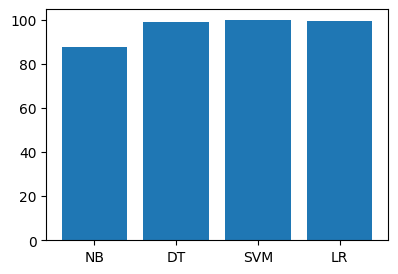

In [98]:
names = ['NB','DT','SVM','LR']
values = [87.903,99.052,99.879,99.352]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)